In [25]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")
from src.dataset import ChestXRayDataset, extract_list, create_split, CLASSES

### Dimension of *train* & *validation* datasets

In [ ]:
#Data directories and paths
root_dir = r"C:\Users\Flavio\Desktop\ChestX-Ray_data"
csv_name = "Data_Entry_2017_v2020.csv"
train_val_list_name = "train_val_list.txt"
test_list_name = "test_list.txt"

image_dir = os.path.join(root_dir, "image")
csv_path = os.path.join(root_dir, csv_name)

#function to create the dataset starting from a idxs list path (train_val / test)
def create_dataset(list_path: str, to_split = False, split_size = None):
    list = extract_list(list_path)

    if to_split:    
        train_list, val_list = create_split(list, val_size = split_size)
        train_data = ChestXRayDataset(image_dir, csv_path, train_list)
        val_data = ChestXRayDataset(image_dir, csv_path, val_list)

        return train_data, val_data

    else:
        data = ChestXRayDataset(image_dir, csv_path, list)
        return data


train_val_path = os.path.join(root_dir, train_val_list_name)
train_data, val_data = create_dataset(train_val_path, to_split=True, split_size = 0.2) #choosing a default 80%/20% split for training/validation
train_val_data = create_dataset(train_val_path)

print(f"Full dataset (train + val) lenght: {len(train_val_data)}")
print(f"Training dataset lenght: {len(train_data)}")
print(f"Validation dataset lenght: {len(val_data)}")

Full dataset (train + val) lenght: 86524
Training dataset lenght: 69219
Validation dataset lenght: 17305


In [37]:
#Numero di classi
def get_n_classes(data):
    df = data.df #extracting datafram
    
    findings = df['Finding Labels'].apply(lambda x: x.split('|')).to_list() #list of diagnosis (for each sample a list of diseases found (e.g. ['Hernia', 'Edema']))
    classes = np.unique(np.hstack(findings))

    return len(classes) - 1 #one value is 'No Finding'
 
n_classes = get_n_classes(train_val_data)
print(f"N. of classes: {n_classes}")

N. of classes: 14


### Classes and labels distribution

In [76]:
#function that returns class distributions in the dataset
def check_imbalances(dataset: ChestXRayDataset):
    #importing the full dataset as pd DataFrame
    df = dataset.df

    counts = [] #(pos_samples, )
    for c in CLASSES:
        pos_df = df[df['Finding Labels'].str.contains(c)]
        pos_samples = len(pos_df) #n. of positive samples to c class
        neg_samples = len(df) - pos_samples #n. of negative samples to c class

        counts.append((pos_samples, neg_samples))

    return zip(CLASSES, counts)


c_to_idx = {CLASSES[i]:i for i in range(len(CLASSES))}

def plot_distributions(dist: zip):
    fig, axs = plt.subplots(2, 7, figsize=(15, 5))
    for c, counts in dist:
        idx = c_to_idx[c]

        axs[idx // 7, idx % 7].bar(c, counts[1], alpha=0.8, label='Neg')
        axs[idx // 7, idx % 7].bar(c, counts[0], alpha=0.8, label='Pos')

        axs[idx // 7, idx % 7].legend()

    plt.tight_layout()
    plt.show() 

Train

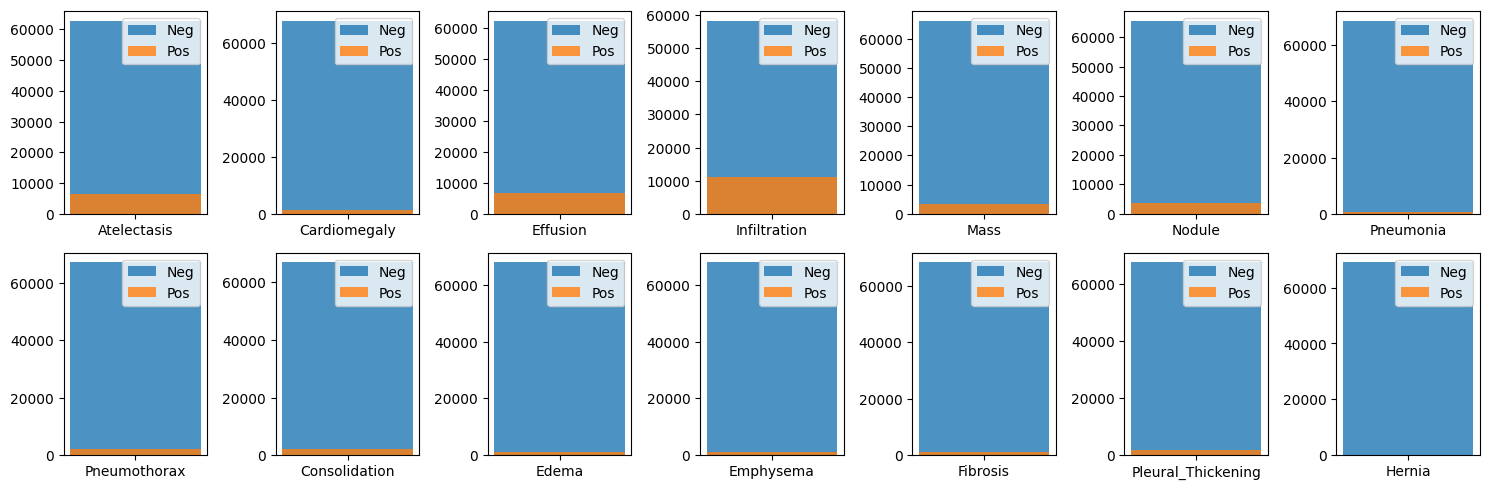

In [78]:
#extracting the class distributions
train_dist = check_imbalances(train_data) 

#visual proof: classes are seriously unbalanced
plot_distributions(train_dist)

Validation

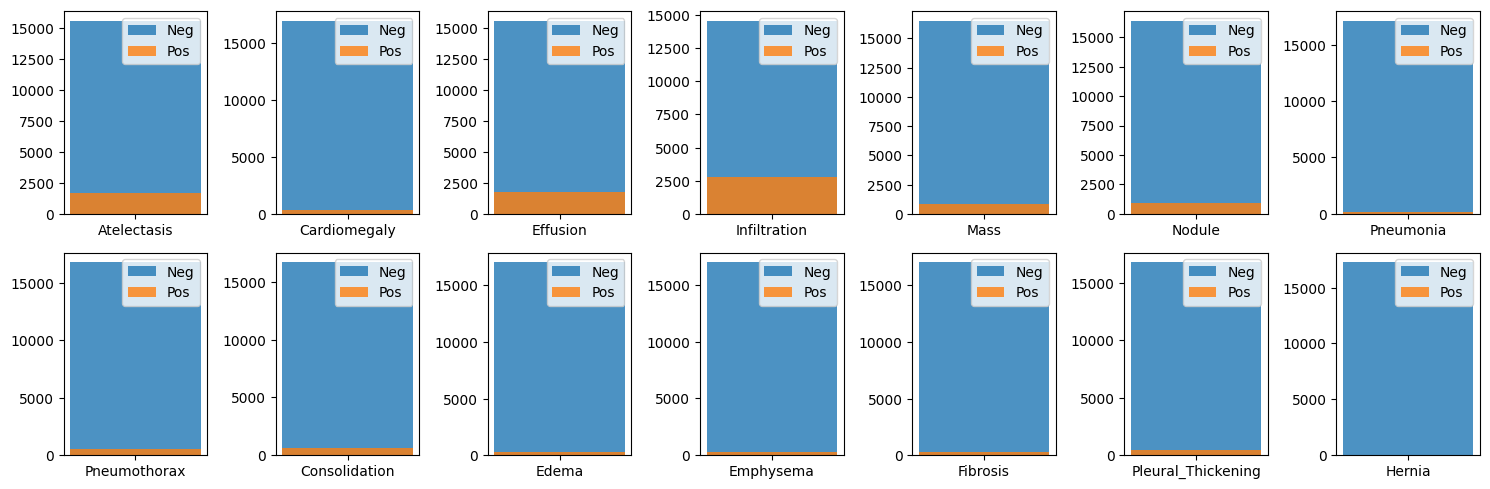

In [79]:
#extracting the class distributions
val_dist = check_imbalances(val_data) 

#visual proof: classes are seriously unbalanced
plot_distributions(val_dist)